In [ ]:
# 데이터 다운로드
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz

--2024-11-27 04:11:13--  https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9901821 (9.4M) [application/x-gzip]
Saving to: ‘wikispeedia_paths-and-graph.tar.gz’

wikispeedia_paths-a 100%[===================>]   9.44M  4.06MB/s    in 2.3s    

2024-11-27 04:11:16 (4.06 MB/s) - ‘wikispeedia_paths-and-graph.tar.gz’ saved [9901821/9901821]

wikispeedia_paths-and-graph/
wikispeedia_paths-and-graph/paths_finished.tsv
wikispeedia_paths-and-graph/paths_unfinished.tsv
wikispeedia_paths-and-graph/articles.tsv
wikispeedia_paths-and-graph/categories.tsv
wikispeedia_paths-and-graph/links.tsv
wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt


In [ ]:
# 데이터 확인
!head -n 20 wikispeedia_paths-and-graph/articles.tsv
!head -n 20 wikispeedia_paths-and-graph/links.tsv

# The list of all articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   article
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
%C3%85land
%C3%89douard_Manet
%C3%89ire
%C3%93engus_I_of_the_Picts
%E2%82%AC2_commemorative_coins
10th_century
11th_century
# The list of all links between articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   linkSource   linkTarget
#
# When publishing on this data set, please cite

In [ ]:
# 그래프 생성
import networkx as nx
from urllib.parse import unquote

G = nx.DiGraph()

with open('wikispeedia_paths-and-graph/articles.tsv') as f:

  for line in f:
    line = line.strip()
    if line == "" or line[0] == '#': continue
    node = unquote(line)

    G.add_node(node)

with open('wikispeedia_paths-and-graph/links.tsv') as f:

  for line in f:
    line = line.strip()
    if line == "" or line[0] == '#': continue

    u, v = line.split()
    u = unquote(u)
    v = unquote(v)

    G.add_edge(u, v)

In [ ]:
# Basic Statistics
n_nodes = len(G.nodes())
n_edges = len(G.edges())
n_triangles =sum(nx.triangles(G.to_undirected()).values()) // 3
density = n_edges * 2 / (n_nodes * (n_nodes - 1))

print(f'# nodes: {n_nodes}')
print(f'# edges: {n_edges}')
print(f'# density: {density}')
print(f'# triangles: {n_triangles}')

# nodes: 4604
# edges: 119882
# density: 0.011313778854231923
# triangles: 550545


In [ ]:
# Centrality 계산
degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G,200)
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())

In [ ]:
# 각 Centrality 별로 내림차순 출력
print("Deg Rank")
for line in sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("In-Deg Rank")
for line in sorted(indegree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("Out-Deg Rank")
for line in sorted(outdegree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("Betweenness Rank")
for line in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("closeness Rank")
for line in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("pagerank Rank")
for line in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("clustering Rank")
for line in sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("triangles Rank")
for line in sorted(triangles.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

Deg Rank
('United_States', 0.40082554855529)
('United_Kingdom', 0.24766456658700847)
('Europe', 0.23723658483597654)
('France', 0.2268086030849446)
('England', 0.2005213990875516)
('Germany', 0.19813165326960677)
('World_War_II', 0.18900716923745384)
('English_language', 0.15555072778622636)
('India', 0.1503367369107104)
('Africa', 0.1496849880512709)
In-Deg Rank
('United_States', 0.3369541603302194)
('United_Kingdom', 0.21116663045839668)
('France', 0.20834238540082553)
('Europe', 0.20269389528568324)
('England', 0.16315446447968715)
('World_War_II', 0.16315446447968715)
('Germany', 0.16141646752118183)
('India', 0.132739517705844)
('English_language', 0.12991527264827285)
('London', 0.12752552683032803)
Out-Deg Rank
('United_States', 0.0638713882250706)
('Driving_on_the_left_or_right', 0.05539865305235715)
('List_of_countries', 0.05300890723441234)
('List_of_circulating_currencies', 0.051270910275907015)
('List_of_sovereign_states', 0.04692591787964371)
('Africa', 0.04605691940039105

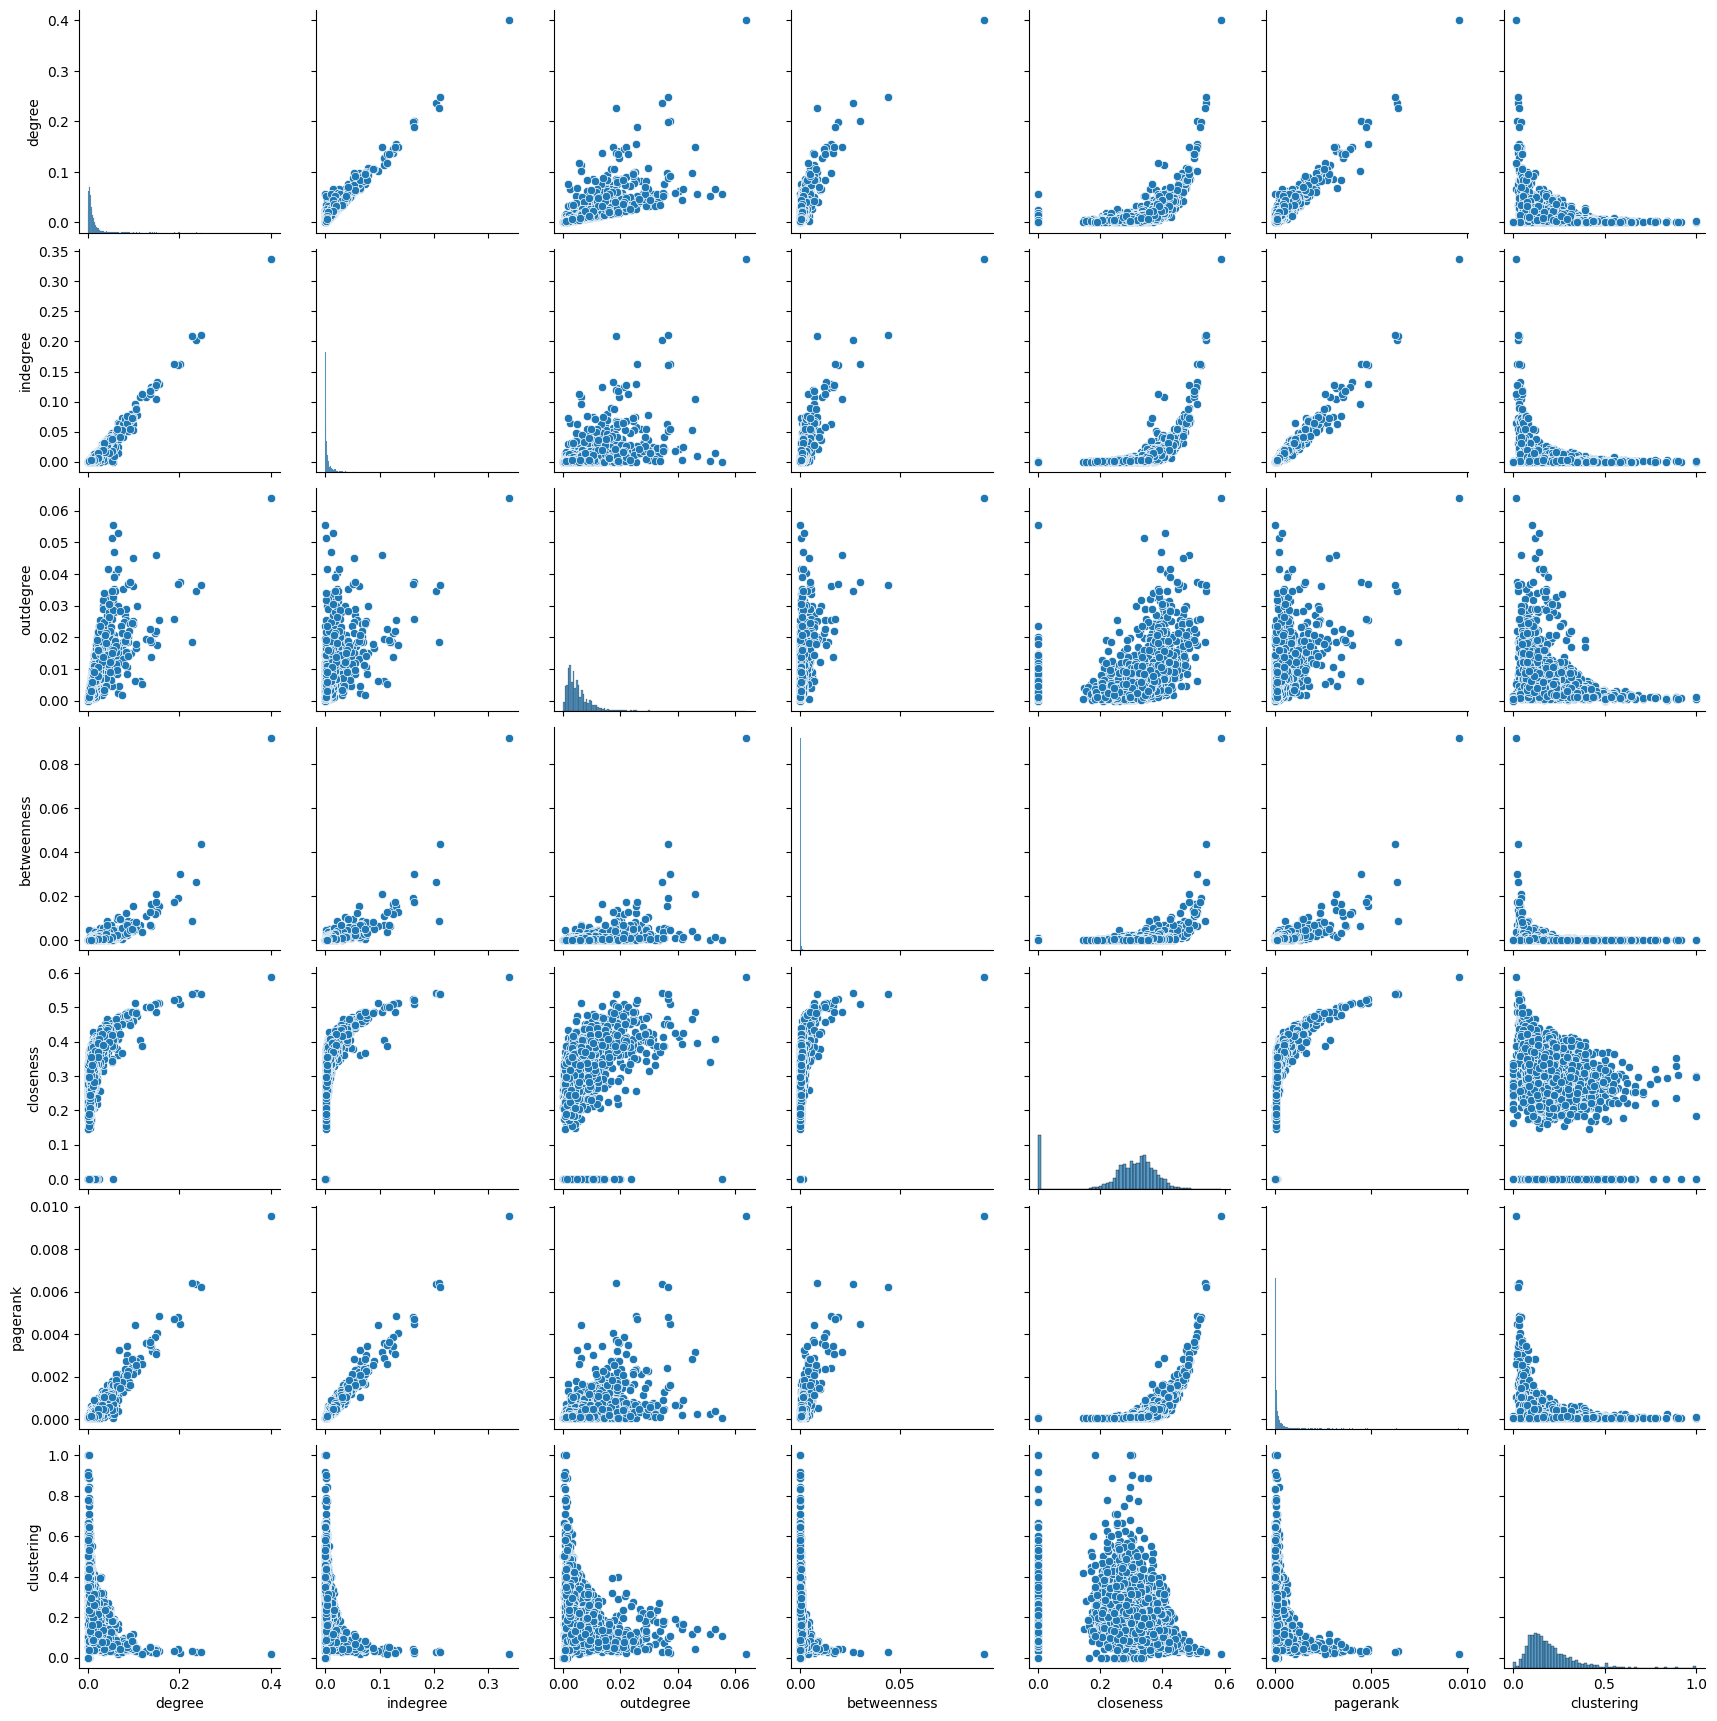

In [ ]:
# Centrality 사이 관계 분석
# 각 centrality 결과를 리스트 형식으로 변환

nodes = G.nodes()
degree_arr = [degree[node] for node in nodes]
indegree_arr = [indegree[node] for node in nodes]
outdegree_arr = [outdegree[node] for node in nodes]
betweenness_arr = [betweenness[node] for node in nodes]
closeness_arr = [closeness[node] for node in nodes]
pagerank_arr = [pagerank[node] for node in nodes]
clustering_arr = [clustering[node] for node in nodes]
triangles_arr = [triangles[node] for node in nodes]

# Scatter plot으로 관계 분석

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

a = np.array([degree_arr, indegree_arr, outdegree_arr, betweenness_arr, closeness_arr, pagerank_arr, clustering_arr]).T
df = pd.DataFrame(a, columns=['degree', 'indegree', 'outdegree', 'betweenness', 'closeness', 'pagerank', 'clustering'])
sns.pairplot(df)
plt.show()